# Part 1. Preparation

In [ ]:
# pip install geopandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd

In [ ]:
import csv
from google.colab import files
uploaded = files.upload()
# with open('Cleaned.csv') as data:
#     reader = csv.DictReader(data)
#     csv_dict_data = list(reader)
#     print(len(csv_dict_data))
    
import pandas as pd
data = pd.read_csv('Cleaned.csv')


Saving Cleaned.csv to Cleaned.csv


# Part 2. Visualization

## Part 2.1 Offense category

In [ ]:
Offense_Category = data["Offense.Category"]

In [ ]:
df_top5 = Offense_Category.value_counts()[0:5]

In [ ]:
df_top5

Religion/Religious Practice           654
Race/Color                            348
Sexual Orientation                    183
Gender                                 55
Ethnicity/National Origin/Ancestry     48
Name: Offense.Category, dtype: int64

In [ ]:
crime_label = ["Religious Practice", "Race", "Sexual Orientation", "Gender", "Ethnicity"]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Creating explode data
explode = (0.1, 0.02, 0.04, 0.06, 0.1)
 
# Creating color parameters
colors = ( "mediumblue", "royalblue", "cornflowerblue","lightskyblue", "lightsteelblue")
 
# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "white" }

In [ ]:
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

Text(0.5, 1.0, 'Crime Categories Pie Chart')

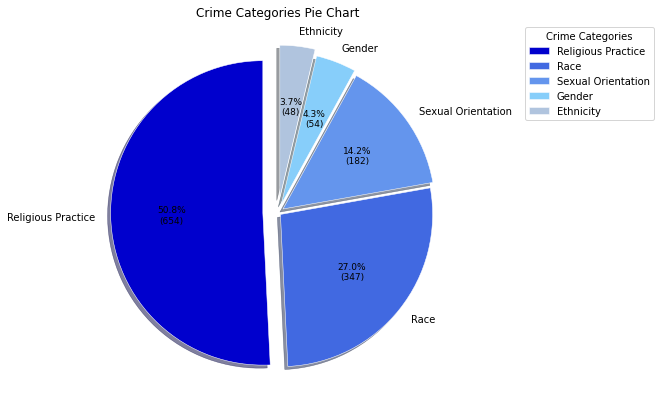

In [ ]:
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(df_top5,
                                  autopct = lambda pct: func(pct, df_top5),
                                  explode = explode,
                                  labels = crime_label,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
# Adding legend
ax.legend(wedges, crime_label,
          title ="Crime Categories",
          loc = 0,
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 9, weight ="light")
ax.set_title("Crime Categories Pie Chart")
 
# show plot

## Part 2.2 Time

In [ ]:
df_csv = pd.DataFrame(data)
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Complaint.Year.Number          1296 non-null   int64 
 1   Month.Number                   1296 non-null   int64 
 2   Record.Create.Date             1296 non-null   object
 3   Complaint.Precinct.Code        1296 non-null   int64 
 4   Patrol.Borough.Name            1296 non-null   object
 5   County                         1296 non-null   object
 6   Law.Code.Category.Description  1296 non-null   object
 7   Bias.Motive.Description        1296 non-null   object
 8   Offense.Category               1296 non-null   object
dtypes: int64(3), object(6)
memory usage: 91.2+ KB


In [ ]:
# split record create date to year, month and date

date = df_csv['Record.Create.Date'] 
date

0         2/8/19
1         3/9/19
2         3/8/19
3        3/10/19
4        5/11/19
          ...   
1291     7/27/21
1292     8/20/21
1293    12/28/21
1294     4/19/21
1295     8/27/21
Name: Record.Create.Date, Length: 1296, dtype: object

In [ ]:
# extracting year and month from the 'Record.Create/Date'

df_csv[["month", "day", "year"]] = df_csv['Record.Create.Date'].str.split("/", expand = True)
# print(df_csv)

month_cat = df_csv[["year", "month"]]
month_cat

,year,month
0,19,2
1,19,3
2,19,3
3,19,3
4,19,5
...,...,...
1291,21,7
1292,21,8
1293,21,12
1294,21,4


In [ ]:
# Add crime rate count by year and month 
month_crime = month_cat.value_counts(['year','month']).reset_index(name="count").astype(int)
month_crime = month_crime.sort_values(['year','month'],ignore_index=True)
month_crime

,year,month,count
0,19,1,36
1,19,2,31
2,19,3,54
3,19,4,28
4,19,5,36
5,19,6,37
6,19,7,29
7,19,8,45
8,19,9,29
9,19,10,48


In [ ]:
year = month_crime['year']
month = month_crime['month']
co = month_crime['count']

import datetime

date = []
count = []

for n in range(len(month_crime)):
    # print(n)
    date.append(datetime.date(year[n],month[n],day = 1))
    count.append(co[n])

# date

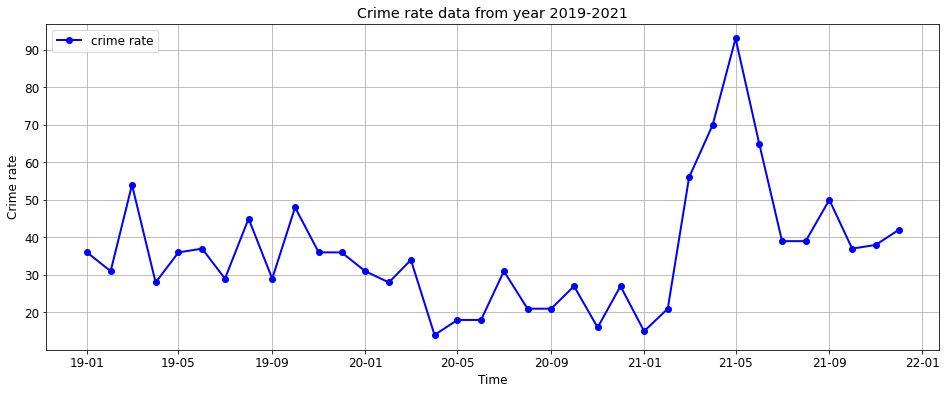

In [ ]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize = (16,6))

# Specify how 
ax.plot(date,count,'-o',
        c = 'blue', 
        label = 'crime rate',
        linewidth = 2)

ax.set_xlabel('Time')
ax.set_ylabel('Crime rate')
ax.set_title('Crime rate data from year 2019-2021')
ax.grid(True)
ax.legend(loc='upper left');

## Part 2.3 County

In [ ]:
# group crime counts based on the county
city = df_csv["County"].value_counts()
county_df = pd.DataFrame(city)
county_df.columns=['counts']
county_df['boroname']=['Manhattan','Brooklyn','Queens','Bronx','Staten Island']
print(county_df)

          counts       boroname
NEW YORK     462      Manhattan
KINGS        441       Brooklyn
QUEENS       235         Queens
BRONX        110          Bronx
RICHMOND      48  Staten Island


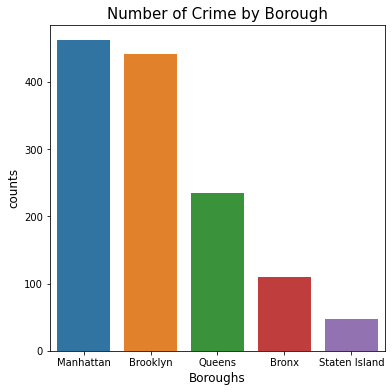

In [ ]:
# Draw a barplot
fig1, ax1 = plt.subplots(1,1, figsize=(6,6))
sns.barplot(x= 'boroname', y='counts', data=county_df, ax=ax1)
ax1.set_title('Number of Crime by Borough', fontsize=15)
ax1.set_xlabel('Boroughs', fontsize=12)
ax1.set_ylabel('counts', fontsize=12)
ax1.tick_params(axis='both', labelsize=10)

(905464.739038086, 1075092.8783935546, 112485.76063504722, 280480.41425942665)

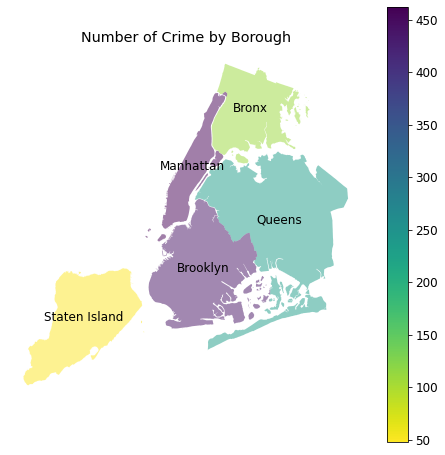

In [ ]:
# Draw a NYC Map Based On Crime
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc.rename(columns={'BoroName':'boroname'}, inplace=True)
bc_geo = nyc.merge(county_df, on='boroname')
fig2,ax2 = plt.subplots(1,1, figsize=(8,8))
bc_geo.plot(column='counts', cmap='viridis_r', alpha=.5, ax=ax2, legend=True)
bc_geo.apply(lambda x: ax2.annotate(s=x.boroname, color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)
plt.title("Number of Crime by Borough")
plt.axis('off')

Text(0.5, 1.0, 'Crime Categories Pie Chart in Manhattan')

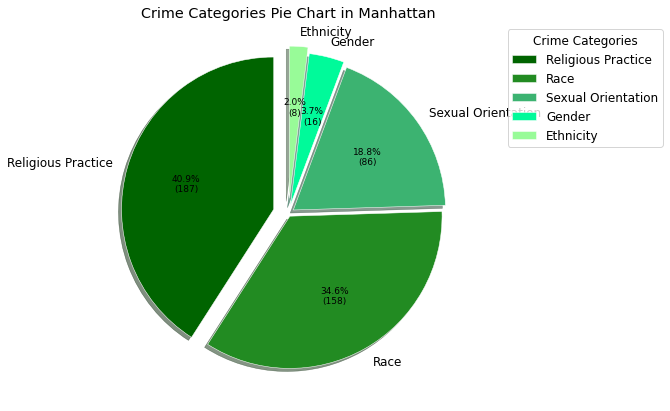

In [ ]:
# find top 5 crime categories in Manhattan
df_con_cat=df_csv.groupby(["County", "Offense.Category"]).size()
ny_top5= df_con_cat['NEW YORK'].sort_values(ascending=False)[0:5]
# Draw the Pie Plot
colors2 = ( "darkgreen", "forestgreen", "mediumseagreen","mediumspringgreen", "palegreen")
fig3, ax3 = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax3.pie(ny_top5,
                                  autopct = lambda pct: func(pct, ny_top5),
                                  explode = explode,
                                  labels = crime_label,
                                  shadow = True,
                                  colors = colors2,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
ax3.legend(wedges, crime_label,
          title ="Crime Categories",
          loc = 0,
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 9, weight ="light")
ax3.set_title("Crime Categories Pie Chart in Manhattan")